In [2]:
%matplotlib inline
import pandas as pd

In [7]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [11]:
titles = pd.DataFrame.from_csv('data/td_housing.csv', index_col=None)
titles.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,169277.0525
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,187758.3940
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,183583.6836
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,179317.4775
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,0,NaN,NaN,NaN,0,1,2010,WD,Normal,150730.0800


In [12]:
# Number of houses sold each month for the year 2007?

In [40]:
t = titles[titles.YrSold == 2007]
t.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
791,2252,20,RL,85.0,10667,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,3,2007,WD,Normal,180051.8092
792,2253,80,RL,56.0,8872,Pave,NaN,IR1,HLS,AllPub,...,0,NaN,NaN,NaN,0,3,2007,WD,Normal,176519.1803
793,2254,80,RL,NaN,10147,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2007,WD,Normal,179028.4292
794,2255,60,RL,NaN,8637,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2007,WD,Abnorml,177161.5839
795,2256,60,RL,63.0,7875,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,180081.5088


In [42]:
df1 = t.groupby('MoSold')
df2 = df1.size()
df2


MoSold
1     18
2     20
3     30
4     27
5     46
6     47
7     56
8     35
9     28
10    25
11    17
12    14
dtype: int64

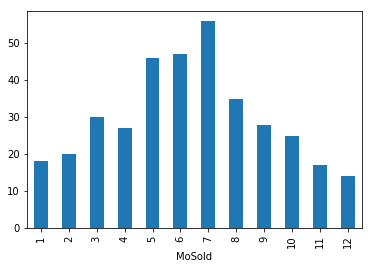

In [44]:
df2.plot(kind='bar')